In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class CONFIG:
    DATA_DIR_PATH = r"D:\dev\linking-writing-processes-to-writing-quality"

raw_train_logs = pd.read_csv(f"{CONFIG.DATA_DIR_PATH}/train_logs.csv")
raw_train_scores = pd.read_csv(f"{CONFIG.DATA_DIR_PATH}/train_scores.csv")

In [28]:
def clean_log_data(log_data):
    def num_unique_text(x):
        return len(set(x))
    
    def share_of_input(x):
        return np.sum(x == "Input") / len(x)
        
    agg_dict = {"event_id": 'count',
                "activity": share_of_input,
                'action_time': ['mean','sum'],
                'down_event': num_unique_text,
                'up_event': num_unique_text,
                'text_change': num_unique_text,
                'word_count': ['mean', 'sum']}

    grouped_df = log_data.groupby('id').agg(agg_dict)

    grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
    
    return grouped_df

In [29]:
clean_log_data(raw_train_logs)

,event_id_count,activity_share_of_input,action_time_mean,action_time_sum,down_event_num_unique_text,up_event_num_unique_text,text_change_num_unique_text,word_count_mean,word_count_sum
id,,,,,,,,,
001519c8,2557,0.786077,116.246774,297243,12,12,17,128.116152,327593
0022f953,2454,0.789731,112.221271,275391,17,17,12,182.714751,448382
0042269b,4136,0.849855,101.837766,421201,13,18,19,194.772727,805580
0059420b,1556,0.838046,121.848329,189596,15,15,10,103.618895,161231
0075873a,2531,0.767286,123.943896,313702,11,11,9,125.082971,316585
...,...,...,...,...,...,...,...,...,...
ffb8c745,4739,0.757122,105.437856,499670,13,13,13,256.353661,1214860
ffbef7e5,2604,0.919739,82.266129,214221,11,11,8,223.013057,580726
ffccd6fd,3063,0.930134,75.605615,231580,11,11,6,157.589292,482696


<Axes: ylabel='Frequency'>

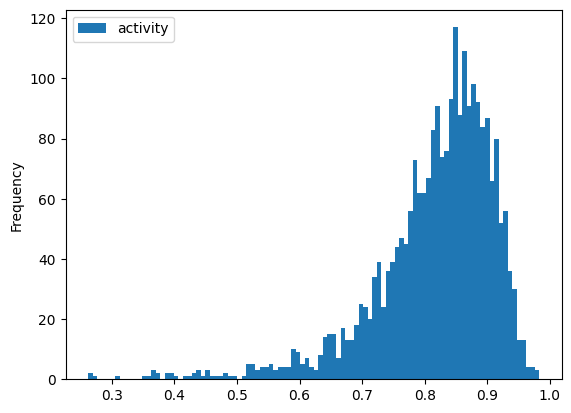

In [33]:
raw_train_logs.groupby(['id']).agg({'activity': lambda x: np.sum(x == "Input") / len(x)}).plot(kind='hist', bins=100)

<Axes: xlabel='score', ylabel='action_time'>

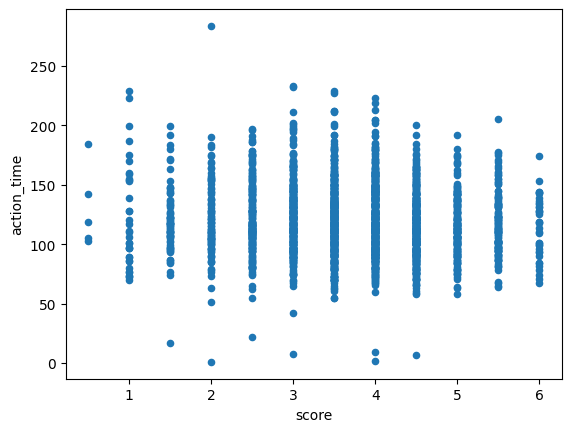

In [59]:
(raw_train_logs
    .groupby(['id'])
    .agg({'action_time': lambda x: x.quantile(0.75)})
    .merge(raw_train_scores, on='id')
    .plot(x = 'score', y = 'action_time', kind='scatter'))

In [40]:
raw_train_logs.groupby(['id']).agg({'down_time': 'min', 'up_time': 'max'}).assign(total_write_time=lambda x: x['up_time'] - x['down_time'])

,down_time,up_time,total_write_time
id,,,
001519c8,4526,1801969,1797443
0022f953,30623,1788969,1758346
0042269b,4441,1771669,1767228
0059420b,41395,1404469,1363074
0075873a,78470,1662472,1584002
...,...,...,...
ffb8c745,22467,1791649,1769182
ffbef7e5,21732,1799174,1777442
ffccd6fd,23482,1959363,1935881


In [41]:
raw_train_logs.value_counts('activity')


activity
Input                                     6726796
Remove/Cut                                 970158
Nonproduction                              703851
Replace                                      4448
Paste                                         599
Move From [1306, 1371] To [1061, 1126]          2
Move From [1041, 1121] To [1496, 1576]          1
Move From [669, 847] To [565, 743]              1
Move From [442, 524] To [296, 378]              1
Move From [460, 461] To [465, 466]              1
Move From [460, 465] To [925, 930]              1
Move From [51, 86] To [109, 144]                1
Move From [565, 743] To [669, 847]              1
Move From [61, 136] To [0, 75]                  1
Move From [623, 632] To [624, 633]              1
Move From [624, 625] To [845, 846]              1
Move From [75, 134] To [304, 363]               1
Move From [747, 960] To [1041, 1254]            1
Move From [382, 437] To [458, 513]              1
Move From [810, 906] To [816, 912]       